In [15]:
import datetime

import geopandas as gpd
import pandas as pd
import sqlite3
import xgboost as xgb
from pathlib import Path
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pipeline

In [16]:

def geoPaths()->Path:
    cwd = Path.cwd()
    dc2 = cwd.parent
    return dc2.joinpath("data/unzipped/map")


In [17]:
mapDir = geoPaths()
barnetLSOA = mapDir.joinpath("barnet_lsoa.geojson")
barnet_map = gpd.read_file(barnetLSOA)
barnet_map= barnet_map[['geometry', 'lsoa11cd']]
barnet_map.rename(columns={'lsoa11cd': 'LSOA code'}, inplace=True)


In [18]:
def dbPath() -> Path:
    cwd = Path.cwd()
    dc2 = cwd.parent
    db = dc2.joinpath("data/database_final.db")
    return db


def modelPath(lsoaCode:str) ->Path:
    cwd = Path.cwd()
    dc2 = cwd.parent
    modelPath = dc2.joinpath(f"data/models/{lsoaCode}.bin")
    return modelPath


In [19]:
df = pipeline.main()
df.rename(columns={"LSOA": "LSOA code"}, inplace=True)
df.head()

LOADING UNEMPLOYEMENT
UNEMPLOYEMENT LOADED


100%|██████████| 12/12 [00:06<00:00,  1.86it/s]


,LSOA code,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00
0,E01000115,5.020737,4.858058,5.119812,5.146266,5.249482,5.095469,5.152276,5.119569,5.152033,5.127775,5.119727,5.152276
1,E01000116,10.795442,10.264357,10.287848,8.674163,9.948874,10.395984,11.826907,11.609231,11.768168,11.678127,11.682132,12.213112
2,E01000117,15.448280,13.031735,14.528878,18.546827,17.885620,17.241240,16.080076,19.547098,18.590624,15.386317,15.855565,17.820406
3,E01000118,14.222237,17.214563,11.787148,17.653751,11.858356,13.747580,13.752280,13.744445,13.736516,12.540625,14.359941,13.292912
4,E01000119,11.344867,12.177163,10.591470,7.624488,6.422488,10.328675,8.491477,9.557648,10.605706,10.738141,10.426338,10.446950


In [21]:
# conn = sqlite3.connect(dbPath())
# query_unemployement = "SELECT * FROM montly_unemployement_claimant_count_by_lsoa_barnet"
# unemployement = pd.read_sql(query_unemployement, conn)
# unemployement = unemployement.rename(columns={"geogcode":"LSOA code"})
# unemployement.drop(columns=["index"], inplace=True)
# unemployement.dropna(inplace=True)
# unemployement["date"] = pd.to_datetime(unemployement["date"])
# singleMonth = unemployement[(unemployement["date"].dt.month==12)&(unemployement["date"].dt.year ==2014)]


In [22]:
# singleMonth.drop(columns=["index"], inplace=True);

In [23]:

merged = pd.merge(barnet_map, df, on=["LSOA code"])

,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,18.985261,18.622960,19.227732,19.193263,19.335225,18.429071,18.985805,18.153802,18.371500,18.117337,17.691548,17.593290
std,10.999168,10.792552,11.731497,11.148279,11.469820,10.800515,11.367744,10.805433,10.788051,10.784057,10.390623,10.604343
min,0.021088,0.050587,0.030275,0.023226,0.012328,0.061129,0.022257,0.021022,0.056807,0.028931,0.021022,0.028668
25%,10.246894,10.242919,10.287848,10.314625,10.042048,10.065935,10.474387,9.900834,10.374314,9.932553,9.785534,9.604453
50%,17.546873,17.080690,17.202606,18.297527,17.400702,16.760880,16.760237,15.888656,16.982653,16.061659,16.123142,15.936525
75%,25.888773,25.868746,26.858612,26.945978,25.500507,25.033733,26.554844,25.823599,26.522722,25.519152,24.987511,24.421156
max,52.129517,48.288525,59.498779,55.281544,56.237808,64.694237,63.895412,51.500832,64.147926,57.980793,53.258823,62.135296


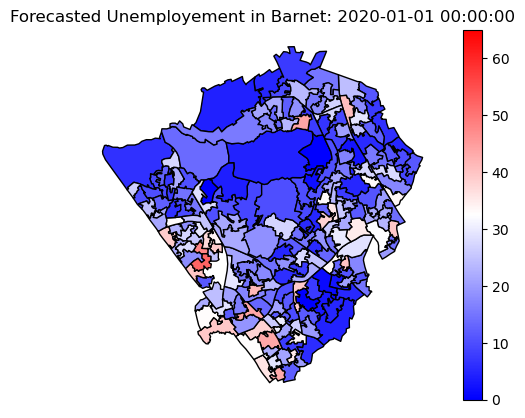

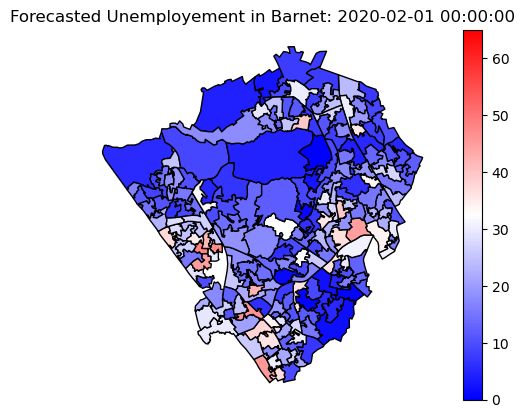

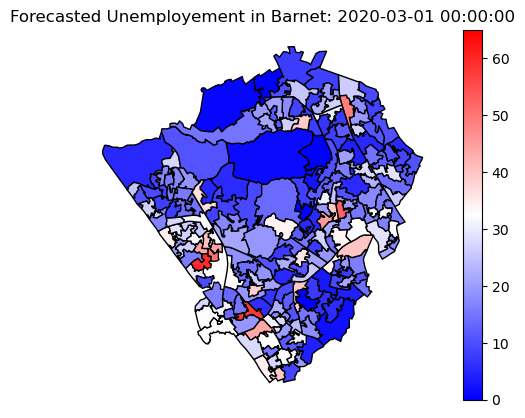

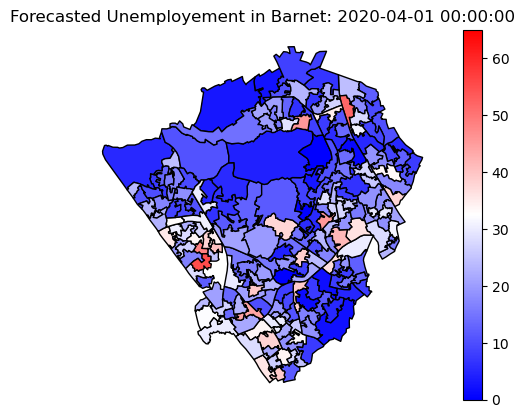

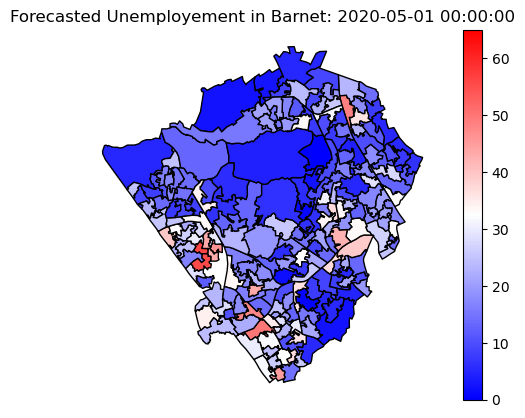

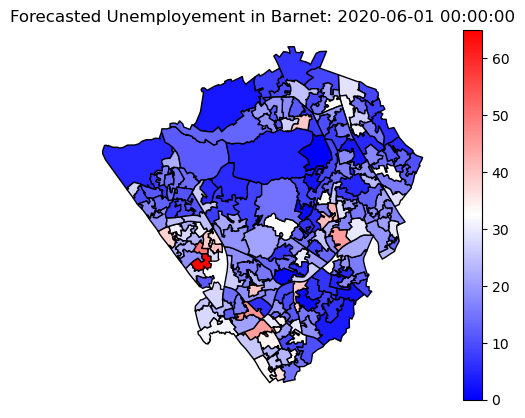

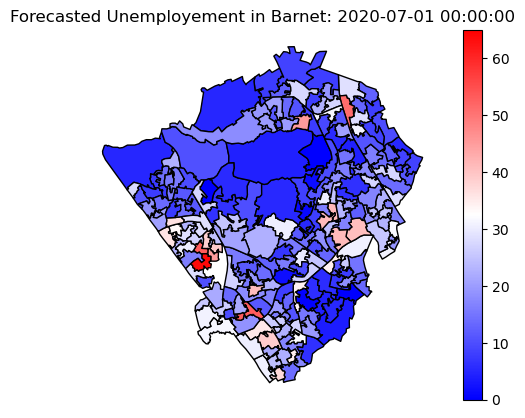

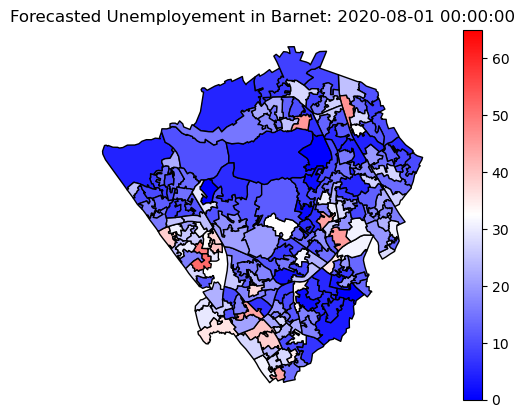

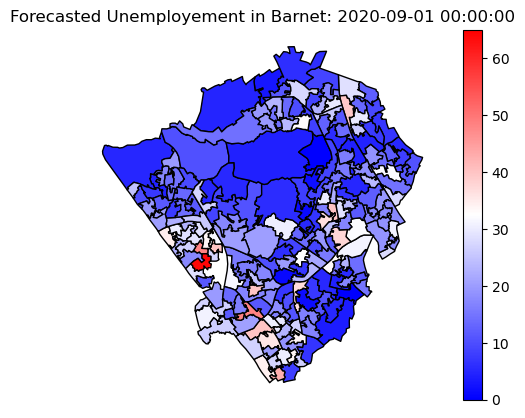

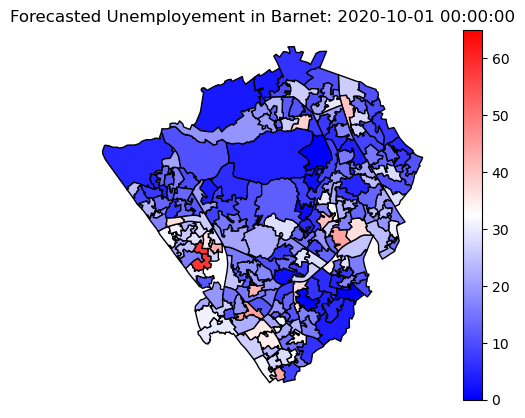

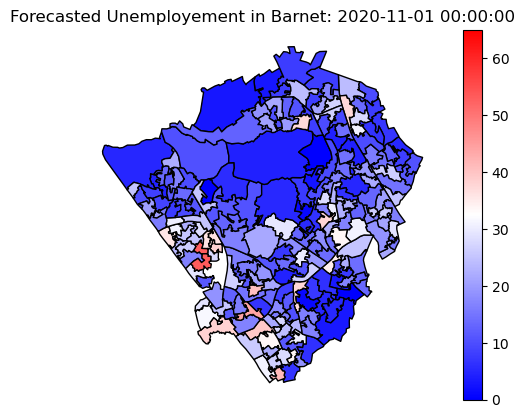

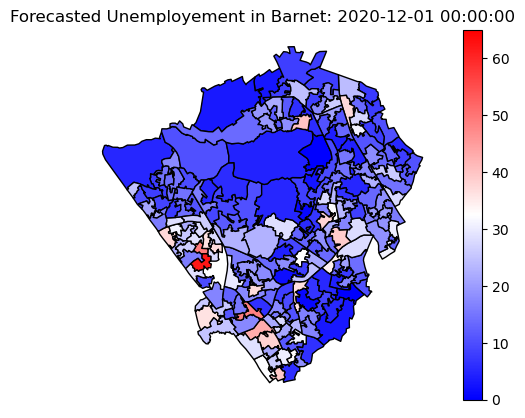

In [24]:
merged.describe()

In [25]:
cwd = Path.cwd()
dc2 = cwd.parent
predGifDir = dc2.joinpath("data/img/predGif/")

cols = df.columns
month_dictionary = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

cols = cols[1:]
for i, column in enumerate(cols):
    fig = merged.plot(column=column,cmap="bwr", vmin=0, vmax=65, legend=True, norm=plt.Normalize(vmin=0, vmax=65))
    fig.axis("off")
    fig.set_title(f"Unemployement in Barnet: {pd.to_datetime(column)}")
    chart = fig.get_figure()
    chart.savefig(predGifDir.joinpath(f"month_{month_dictionary[i+1]}.svg"), dpi=450)


In [25]:
cwd = Path.cwd()
dc2 = cwd.parent
gifDir = dc2.joinpath("data/img/gif/")
month_dictionary = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}


for intMonth in range(1,13):
    singleFrame = unemployement[(unemployement["date"].dt.month==1)&(unemployement["date"].dt.year ==2014)]
    merged = pd.merge(barnet_map, singleMonth, on=["LSOA code"])
    fig = merged.plot(column="value",cmap="Blues", vmin=0, vmax=65, legend=True, norm=plt.Normalize(vmin=0, vmax=65))
    fig.axis("off")
    fig.set_title(f"Unemployement in Barnet: {month_dictionary[intMonth]}, 2014")
    chart = fig.get_figure()
    chart.savefig(gifDir.joinpath(f"month_{intMonth}.svg"), dpi=450)
